In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Earthquake Intensity Map of Turkiye

Earthquake Intensity Data was obtained from version 15 from [USGS](https://earthquake.usgs.gov/earthquakes/map/?extent=31.98944,23.02734&extent=43.99281,49.74609&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%222023-02-01%2000:00:00%22,%22endtime%22:%222023-02-28%2023:59:59%22,%22maxlatitude%22:42.778,%22minlatitude%22:33.394,%22maxlongitude%22:47.813,%22minlongitude%22:24.961,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) and was overlayed with shapefiles of Turkey admin 2 region taken from [UNOCHA](https://data.humdata.org/organization/ocha-turkey). This can be used as a baseline map upon which other indicators can be visualized. 

In [2]:
mi_feb20 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb20 6p3/mi.shp')
mi_feb06_7p5 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb06 7p5/mi.shp')
mi_feb06_7p8 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb06 7p8/mi.shp')
mi_feb6_6p0_1 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb06 6p0_1/mi.shp')
mi_feb6_6p0_2 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb06 6p0_2/mi.shp')
mi_feb6_6p7 = gpd.read_file('../../data/earthquake-intensity/raw/ShakeMap Feb06 6p7/mi.shp')


In [3]:
turkey_adm2 = gpd.read_file('../../data/turkey_administrativelevels0_1_2/tur_polbna_adm2.shp')

In [6]:
gdf_adm4_7p8 = mi_feb06_7p8[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])
gdf_adm4_7p5 = mi_feb06_7p5[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])
mi_feb6_6p0_1 = mi_feb6_6p0_1[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])
mi_feb6_6p0_2 = mi_feb6_6p0_2[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])
gdf_adm4_6p7 = mi_feb6_6p7[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])
gdf_adm4_feb20 = mi_feb20[['PARAMVALUE', 'geometry']].sjoin(turkey_adm2[['adm2_en', 'adm1_en', 'geometry']])

In [25]:
df_7p8 = gdf_adm4_7p8.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[[ 'adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_7p5 = gdf_adm4_7p5.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[[ 'adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_6p0_1 = mi_feb6_6p0_1.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[[ 'adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_6p0_2 = mi_feb6_6p0_2.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[[ 'adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_6p7 = gdf_adm4_6p7.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[[ 'adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_feb20 = gdf_adm4_feb20.groupby(['adm2_en', 'adm1_en']).mean('PARAMVALUE').reset_index()[['adm2_en', 'adm1_en','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)


In [26]:
df_7p8.rename(columns = {'PARAMVALUE':'mean_7p8'}, inplace=True)
df_7p5.rename(columns = {'PARAMVALUE':'mean_7p5'}, inplace=True)
df_6p0_1.rename(columns = {'PARAMVALUE':'mean_6p0_1'}, inplace=True)
df_6p0_2.rename(columns = {'PARAMVALUE':'mean_6p0_2'}, inplace=True)
df_6p7.rename(columns = {'PARAMVALUE':'mean_6p7'}, inplace=True)
df_feb20.rename(columns = {'PARAMVALUE':'mean_feb20'}, inplace=True)

In [27]:
df = turkey_adm2[['adm2_en', 'adm1_en']].merge(df_7p5, on = ['adm2_en', 'adm1_en'], how = 'left').merge(df_7p8, on = ['adm2_en', 'adm1_en'], how='left').merge(df_6p0_2, on = ['adm2_en', 'adm1_en'], how='left').merge(df_6p0_1,on=['adm2_en', 'adm1_en'], how='left').merge(df_6p7, on = ['adm2_en', 'adm1_en'], how='left').merge(df_feb20, on = ['adm2_en', 'adm1_en'], how='left')

In [28]:
df = df.groupby(['adm2_en', 'adm1_en']).mean().reset_index().fillna(0)

In [29]:
import numpy as np
from statistics import mean
#df['mean_intensity_feb6'] = df.apply(lambda x: mean([x['mean_7p5'], x['mean_7p8'], x['mean_6p0_1'], x['mean_6p0_2'], x['mean_6p7']]), axis=1)
df['max_intensity_feb06'] = df.apply(lambda x: max(x['mean_7p5'], x['mean_7p8'], x['mean_6p0_1'], x['mean_6p0_2'],  x['mean_6p7']), axis=1)

In [34]:
df[['adm2_en', 'adm1_en', 'max_intensity_feb06', 'mean_feb20']].to_csv('../../data/earthquake-intensity/turkiye_adm2_earthquake_intensity.csv')

In [36]:
gdf = turkey_adm2.merge(df, on = ['adm2_en', 'adm1_en'])

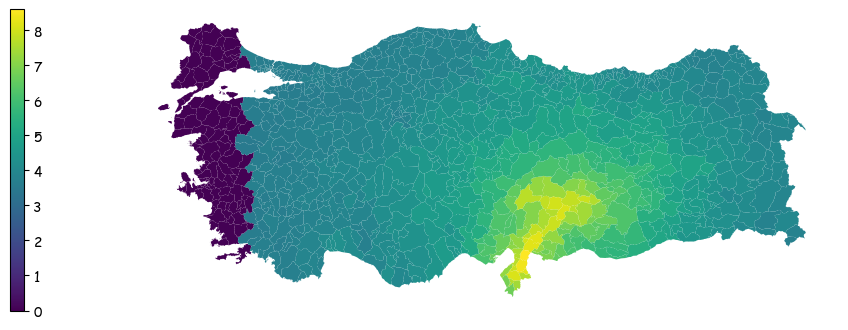

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams["font.family"] = "cursive"

gdf.plot(column='max_intensity_feb06', cmap = 'viridis', ax=ax)
#turkey_adm2.boundary.plot(ax=ax, edgecolor = '#D3D3D3', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

vmin = gdf['max_intensity_feb06'].min()
vmax = gdf['max_intensity_feb06'].max()

sm = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=vmin, vmax=vmax))


divider = make_axes_locatable(ax)
dvider_kwargs = dict(position="left", size="1.5%", pad=0)
fig.colorbar(sm, cax=divider.append_axes(**dvider_kwargs),
             #format = matplotlib.ticker.FuncFormatter(lambda x, pos: ''),
             #ticks = matplotlib.ticker.FixedLocator([])
             )

#plt.savefig('../images/final_check_in/01_earthquake_intensity_feb6.png')